# Project: House Sales in King County, USA

## By National Higher Education Entrance Examination Question Making Team

## Which is also called NHEEEQMT

## Including ADHC, ALBY, ESYC, ICQY

## 1. Startup Checklist: Doing Basic Things

### i Import Libraries

In [1]:
%matplotlib inline
# Showing plots (Only on Jupyter Notebook)
import pandas as pd # Pandas
from sklearn.model_selection import train_test_split, KFold # Split data + KFold
from sklearn.linear_model import Ridge # Regression: Ridge (Linear Regression)
from sklearn.ensemble import RandomForestRegressor # Regression: Random Forest Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error # Testing Functions
from sklearn.preprocessing import MinMaxScaler # Data Normolization
from math import * # Sqrt
import seaborn as sns # Sns Plots
import matplotlib # Matplotlib Plots
import numpy as np # Numpy + Pandas = Perfect
import matplotlib.pyplot as plt # Pyplot Plots

### ii Read Data

In [2]:
house = pd.read_csv('kc_house_data.csv') # Using Pandas's function *read_csv* to read the data

### iii Data Preview

In [3]:
house.head() # Show the first 5 lines of data *house*

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house.info() # Show the information of the features in house.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We can see that there is no missing data. Cheers!

In [5]:
house.describe() # Show the number of data, mean of data, standard values of data, minimum and maximum of data and ... of data.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### "Startup Checklist is complete."

## 2. Taxi Checklist: Data Maneuvering

### i Drop Unusable Data

ID, zipcode, how many times the house has been viewed, the area of the living room and lot in 2015 have no use, so we drop them.

In [6]:
house.drop(['id', 'zipcode', 'view', 'sqft_living15', 'sqft_lot15'], axis=1,inplace=True) # Drop the columns

### ii Maneuvering The Date

In [7]:
house['date'] # View the only *Object* column *date*

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [8]:
house['date'].apply(lambda x: x[8:14]).nunique() # See the *string* after and including *T*

1

We can see that there is only one kind of value which is T000000. So we drop it!

In [9]:
house['date']=house['date'].apply(lambda x: x[0:8]) # Get rid of the *T000000*, leave x[0 to 7]
house['date']=house['date'].apply(lambda x: int(x)) # Make it into an int
# Below is turning the data into *year*, *month*, *day*
house['year']=house['date'].apply(lambda x: x//10000) # Turn the date into: *year*
house['month']=house['date'].apply(lambda x: x//100%100) # Turn the date into: *month*
house['day']=house['date'].apply(lambda x: x%100) # Turn the date into: *day*
house.drop(['date'],axis=1,inplace=True) # So we can drop the date

### iii Maneuvering The Last Renovated Years

In [10]:
house['yr_renovated'] # View the yr_renovated

0           0
1        1991
2           0
3           0
4           0
         ... 
21608       0
21609       0
21610       0
21611       0
21612       0
Name: yr_renovated, Length: 21613, dtype: int64

We can see that zeros are not renovated, which means they are not renovated. Therefore, we create the column yr_last_renovated to transform the zeros into yr_built. Because there are **too** many years, we turn it into yr_last_renovated_dec. And also because of the model making, we turn it into yr_last_renovatedidec, where i means int.

In [11]:
house['yr_last_renovated']=house.apply(lambda x: x['yr_renovated'] if x['yr_renovated']>0 else x['yr_built'],axis=1)
# Turn the yr_renovated and yr_built into yr_last_renovated
house['yr_last_renovated_dec']=house['yr_last_renovated'].apply(lambda x: int(x//10))
house['yr_last_renovated_dec']=house['yr_last_renovated_dec'].apply(lambda x: str(x*10)+'s')
# Turn the yr_last_renovated into yr_last_renovated_dec
house['yr_last_renovatedidec']=house['yr_last_renovated_dec'].apply(lambda x: int(x[0:4]))
# Turn the yr_last_renovated_dec into yr_last_renovatedidec

### "Taxi Checklist is complete."

## 3. Before Takeoff Checklist: Data Visualization & Data Annalasis

### i Time V.S. Price

#### 1) Soldout Time V.S. Price

##### a) Soldout Year V.S. Price

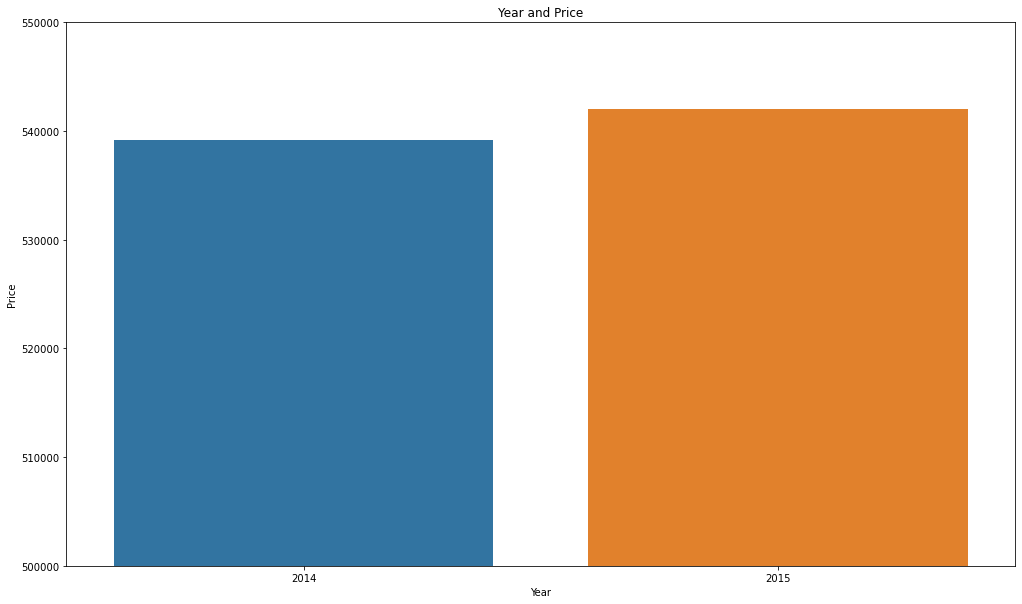

In [12]:
plot_vendor = house.groupby('year')['price'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(bottom=5e+05, top=5.5e+05)
sns.barplot(plot_vendor.index, plot_vendor.values)
plt.title('Year and Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()
# Draw a bar plot about Year sold and Price

Because the maximum of the year is 2015, minimum is 2014, and the price is almost the same, so we drop the year.

In [13]:
house.drop(['year'],axis=1,inplace=True)
# Drop the year feature

##### b) Soldout Month V.S. Price

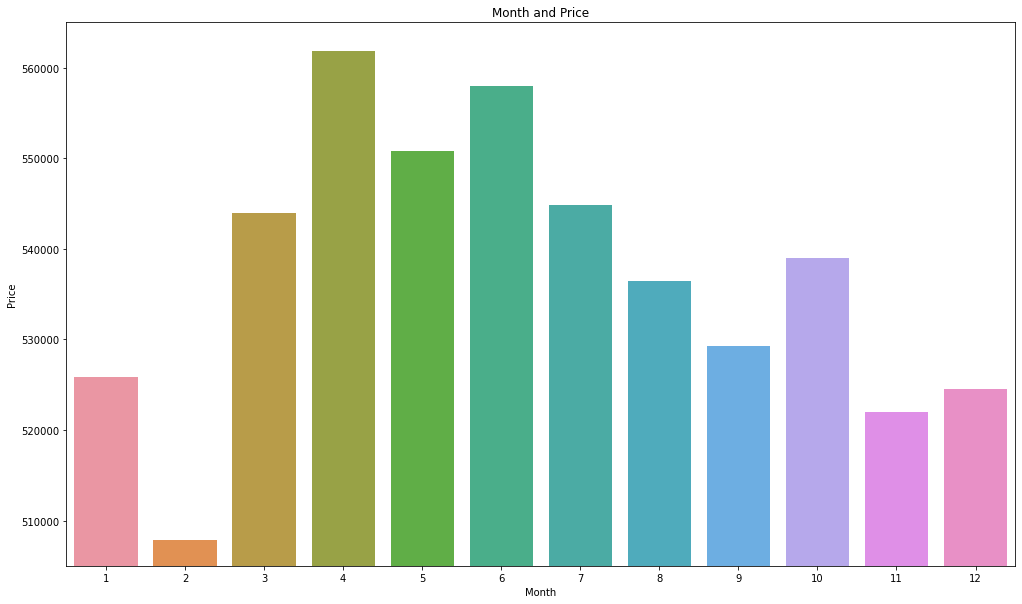

In [14]:
plot_vendor = house.groupby('month')['price'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(bottom=5.05e+05, top=5.65e+05)
sns.barplot(plot_vendor.index,plot_vendor.values)
plt.title('Month and Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()
# Draw a bar plot about Month Sold and Price

We found out that at the start and the end of the year, the price is lower than the ones in the middle.

##### c) Soldout Day V.S. Price

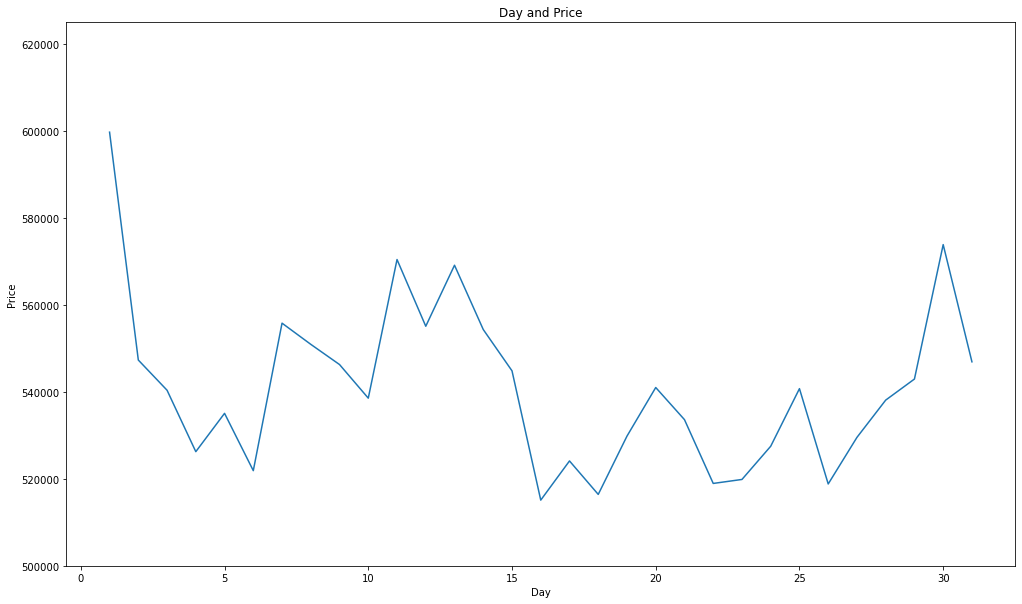

In [15]:
plot_vendor = house.groupby('day')['price'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(bottom=5e+05, top=6.25e+05)
sns.lineplot(plot_vendor.index,plot_vendor.values)
plt.title('Day and Price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()
# Draw a line plot about day and price

As we can see, there is no big relationship between the day and the price.

#### 2) Year Renovated V.S. Price

In [16]:
print(house['yr_renovated'].apply(lambda x: 0 if x == 0 else 1).sum()) # See how many houses have been renovated
print(house['yr_renovated'].count()) # See how many datasets are there in all
print(house['yr_renovated'].apply(lambda x: 0 if x == 0 else 1).sum()/house['yr_renovated'].count())
# See the presentage of the house renovated

914
21613
0.042289362883449776


So we can see that only 914 houses, which are 4% compared to all data (21613), has been renovated.

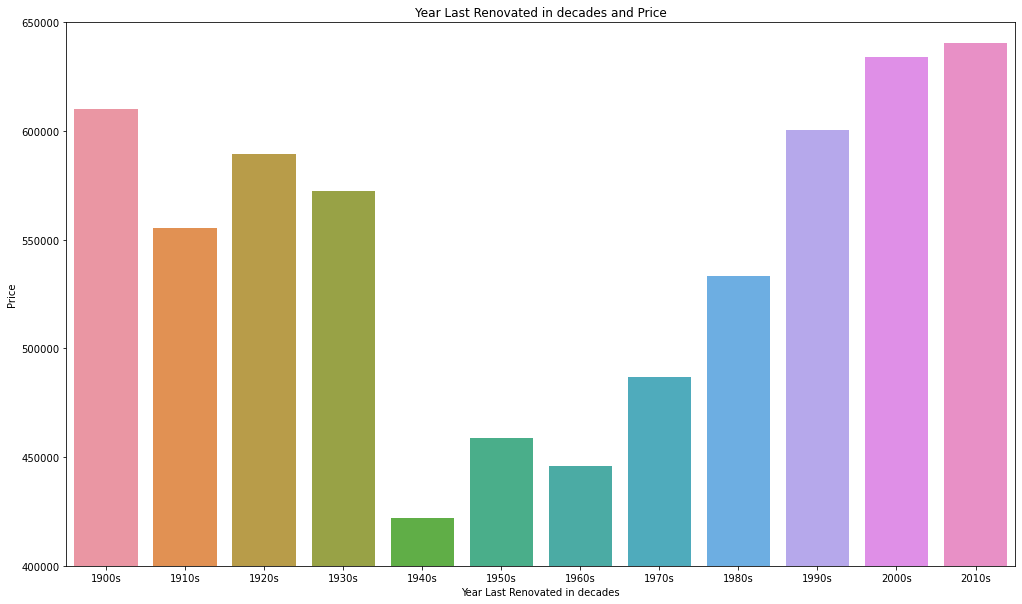

In [17]:
plot_vendor = house.groupby('yr_last_renovated_dec')['price'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(bottom=4e+05, top=6.5e+05)
sns.barplot(plot_vendor.index,plot_vendor.values)
plt.title('Year Last Renovated in decades and Price')
plt.xlabel('Year Last Renovated in decades')
plt.ylabel('Price')
plt.show()
# Draw a bar plot about Year Last Renovated in decades and Price

We find that **very** old houses worth a lot of money, but old houses do not worth a lot. New houses worth a lot.

#### 3) Times V.S. Price

In [18]:
house0=house[['month','day','yr_last_renovatedidec','price']] # Make a DF called house0 (to draw the heatmap)

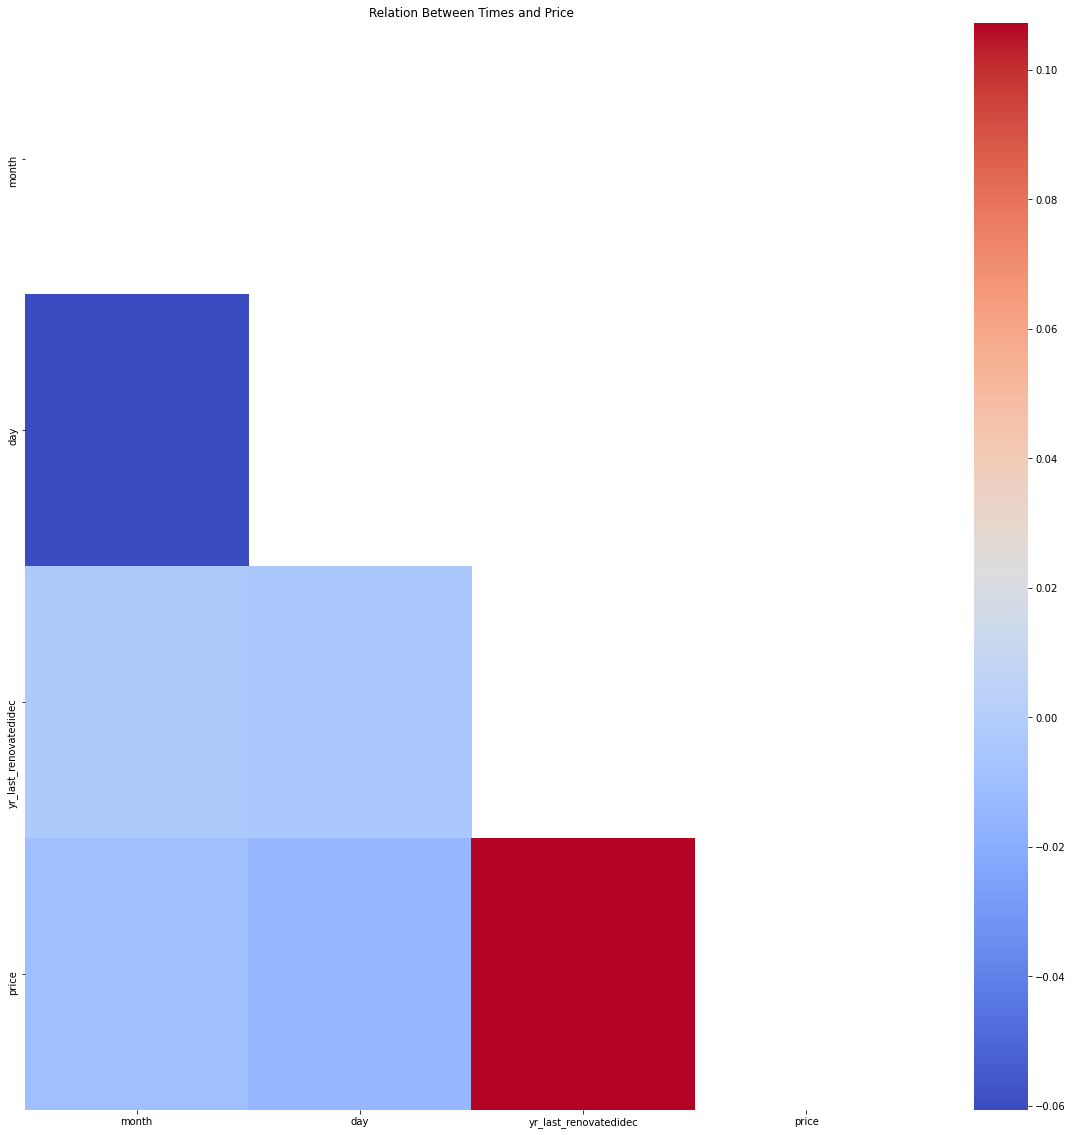

In [19]:
plt.subplots(1,1,figsize=(20,20))
mask = np.zeros_like(house0.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(house0.corr(), mask = mask, cmap = "coolwarm")
plt.title('Relation Between Times and Price')
plt.show()
# Draw a heatmap that shows the relationship between times and price

As we can see, there is no big relationship between them.

### ii Area V.S. Price

#### 1) Basement Area V.S. Price

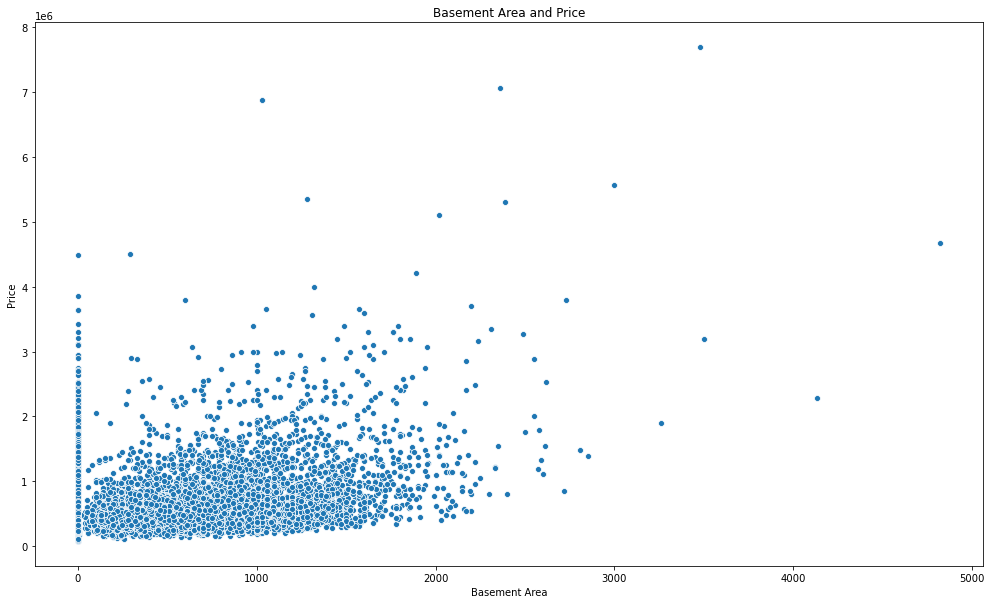

In [20]:
plt.subplots(1,1,figsize=(17,10))
sns.scatterplot(x="sqft_basement", y="price",data=house)
plt.title('Basement Area and Price')
plt.xlabel('Basement Area')
plt.ylabel('Price')
plt.show()
# Draw a Scatter Plot about Basement Area and Price

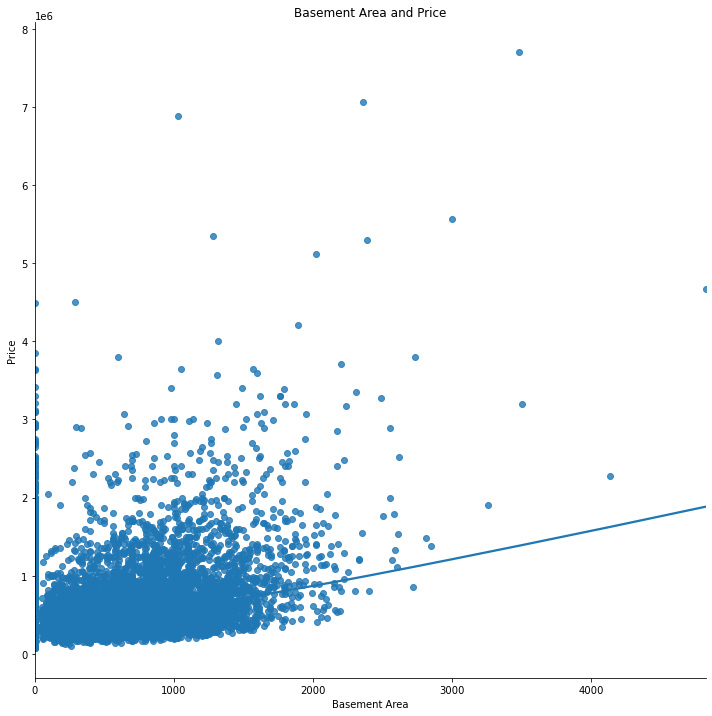

In [21]:
sns.lmplot(x = "sqft_basement", y = "price", data = house, lowess = True, height = 10)
plt.title('Basement Area and Price')
plt.xlabel('Basement Area')
plt.ylabel('Price')
plt.show()
# Draw a Lmplot of Basement Area and Price

From this plot we can sea that basement area has relationship with the price. And most of values about basement area are around 1,000, and their price are about 1,000,000. Price increases as the basement area increases.

#### 2) Lot Area V.S. Price

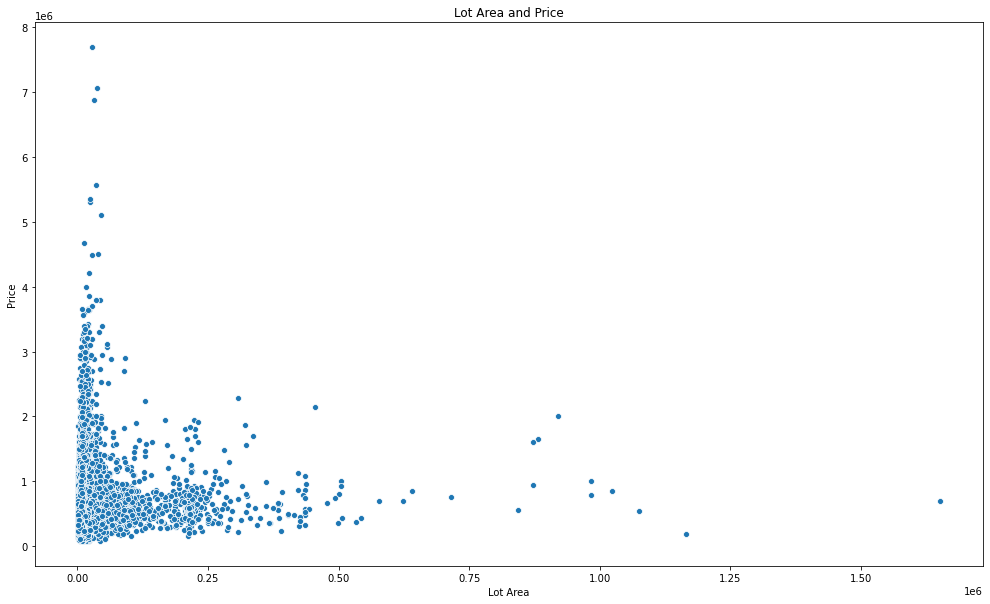

In [22]:
plt.subplots(1,1,figsize=(17,10))
sns.scatterplot(x="sqft_lot", y="price",data=house)
plt.title('Lot Area and Price')
plt.xlabel('Lot Area')
plt.ylabel('Price')
plt.show()
# Draw a Scatter Plot about Lot Area and Price

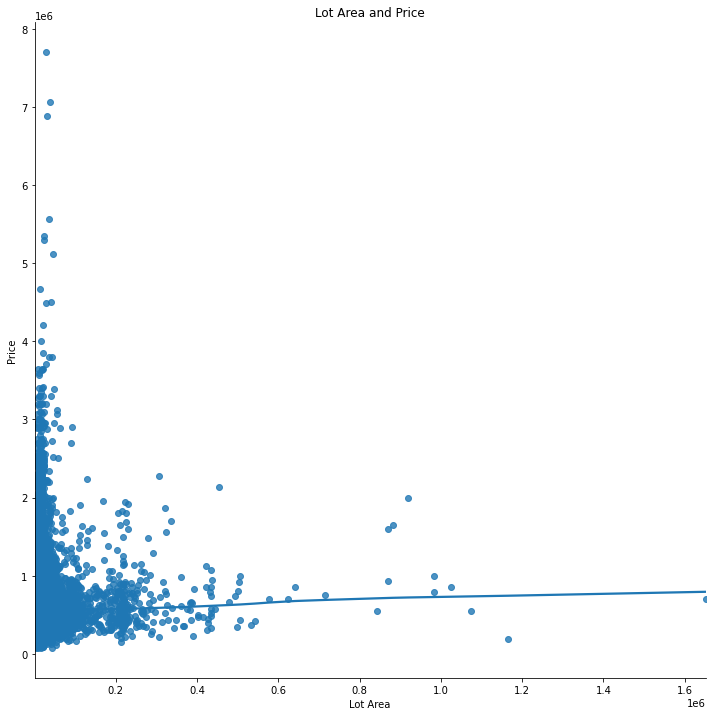

In [23]:
sns.lmplot(x = "sqft_lot", y = "price", data = house, lowess = True, height = 10)
plt.title('Lot Area and Price')
plt.xlabel('Lot Area')
plt.ylabel('Price')
plt.show()
# Draw a Lmplot about Lot Area and Price

From this plot we can see that most of the lot areas are 0.

#### 3) Home Area V.S. Price

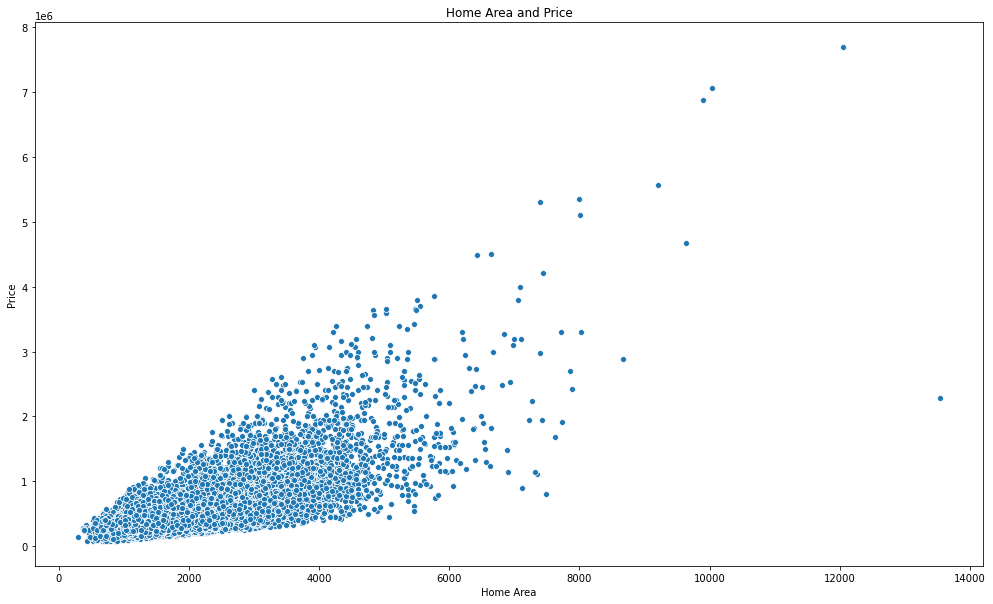

In [24]:
plt.subplots(1,1,figsize=(17,10))
sns.scatterplot(x="sqft_living", y="price",data=house)
plt.title('Home Area and Price')
plt.xlabel('Home Area')
plt.ylabel('Price')
plt.show()
# Draw a Scatter Plot about Home Area and Price

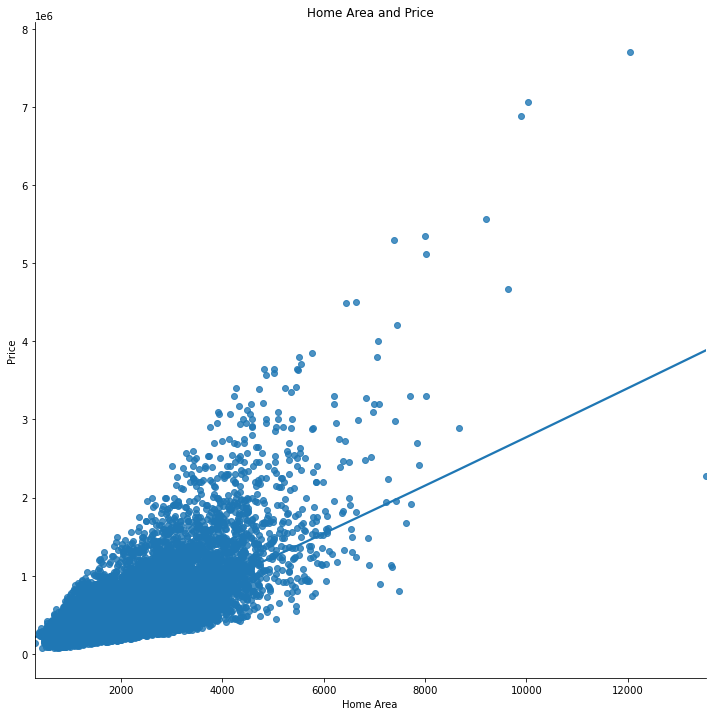

In [25]:
sns.lmplot(x = "sqft_living", y = "price", data = house, lowess = True, height = 10)
plt.title('Home Area and Price')
plt.xlabel('Home Area')
plt.ylabel('Price')
plt.show()
# Draw a Lmplot about Home Area and Price

Already, we can start to form a picture of the relationship between size of home and the price houses were sold for. Clearly, as size of the home goes up, the house price usually goes up. While the area of the home is between 2000-4000, price is mainly 1,000,000.

#### 4) Area Above The Ground V.S. Price

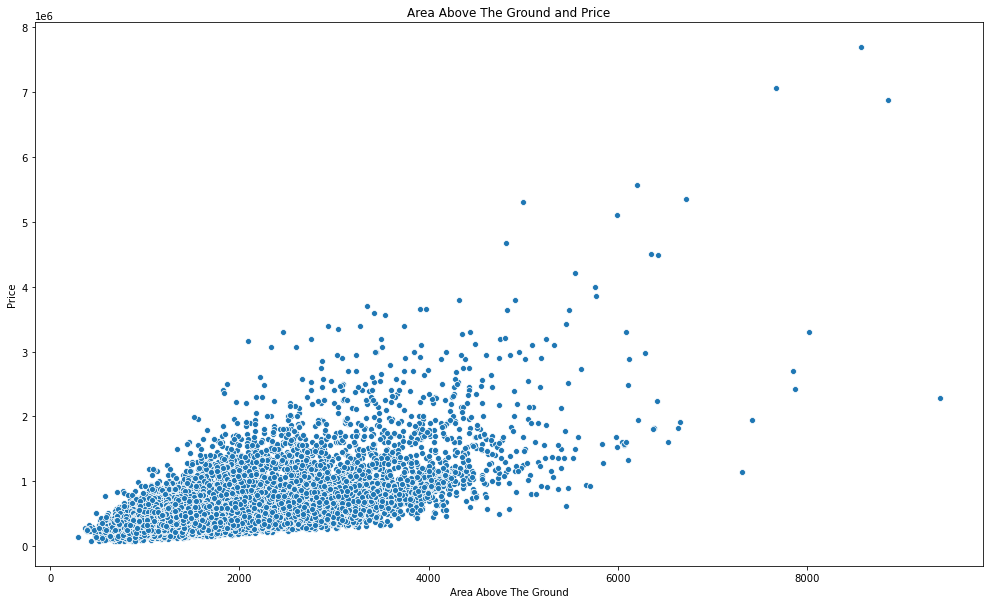

In [26]:
plt.subplots(1,1,figsize=(17,10))
sns.scatterplot(x="sqft_above", y="price",data=house)
plt.title('Area Above The Ground and Price')
plt.xlabel('Area Above The Ground')
plt.ylabel('Price')
plt.show()
# Draw a Scatter Plot about Area Above the Ground and Price

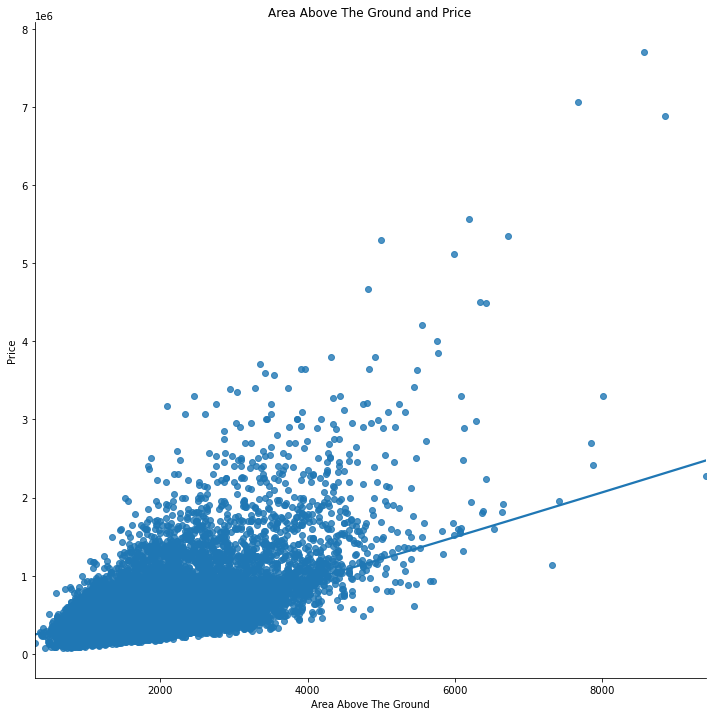

In [27]:
sns.lmplot(x = "sqft_above", y = "price", data = house, lowess = True, height = 10)
plt.title('Area Above The Ground and Price')
plt.xlabel('Area Above The Ground')
plt.ylabel('Price')
plt.show()
# Draw a Lmplot about Area Above the Ground and Price

Clearly, as size of the area above the ground goes up, the house price goes up. While the area above the fround is between 2000-4000,price is mainly 1,000,000.

#### 5) Relation Between Areas

In [28]:
house1=house[['sqft_living','sqft_lot','sqft_basement','sqft_above','price']] # Make a DF called house1 (to draw the heatmap)

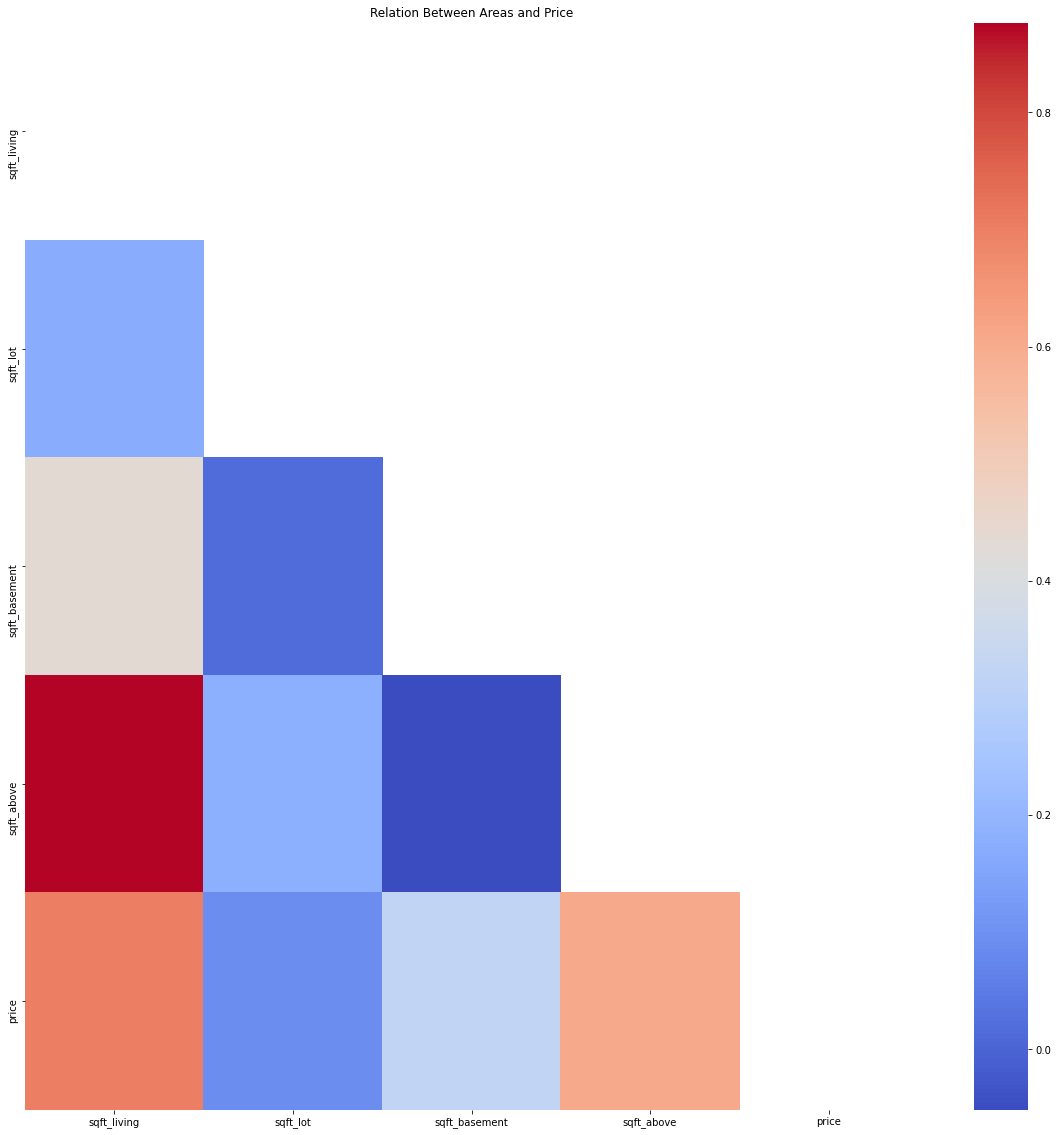

In [29]:
plt.subplots(1,1,figsize=(20,20))
mask = np.zeros_like(house1.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(house1.corr(), mask = mask, cmap = "coolwarm")
plt.title('Relation Between Areas and Price')
plt.show()
# Draw a heatmap that shows the relationship between areas and price

We can see that the area above the ground and the area of the house has great relationship, and the peice has great relationship with area above the ground and the area of the house.

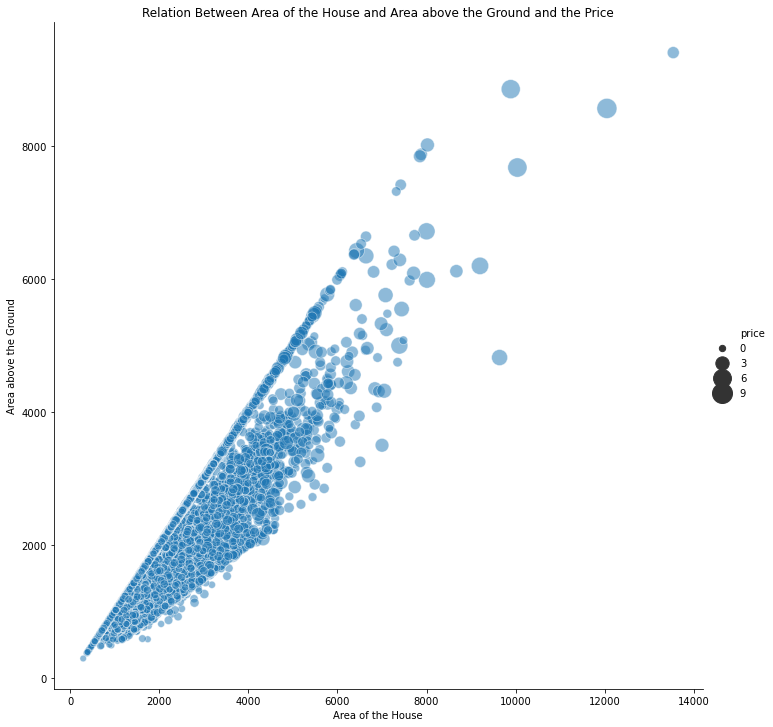

In [30]:
sns.relplot(x="sqft_living", y="sqft_above", size="price",sizes=(40, 400), alpha=.5, palette="muted",height=10, data=house)
plt.title('Relation Between Area of the House and Area above the Ground and the Price')
plt.xlabel('Area of the House')
plt.ylabel('Area above the Ground')
plt.show()
# Draw a relationplot of Area of the House, Area above the Ground and the Price

From the graph above, we can find out that the area above the ground goes up as the area of the house goes up.

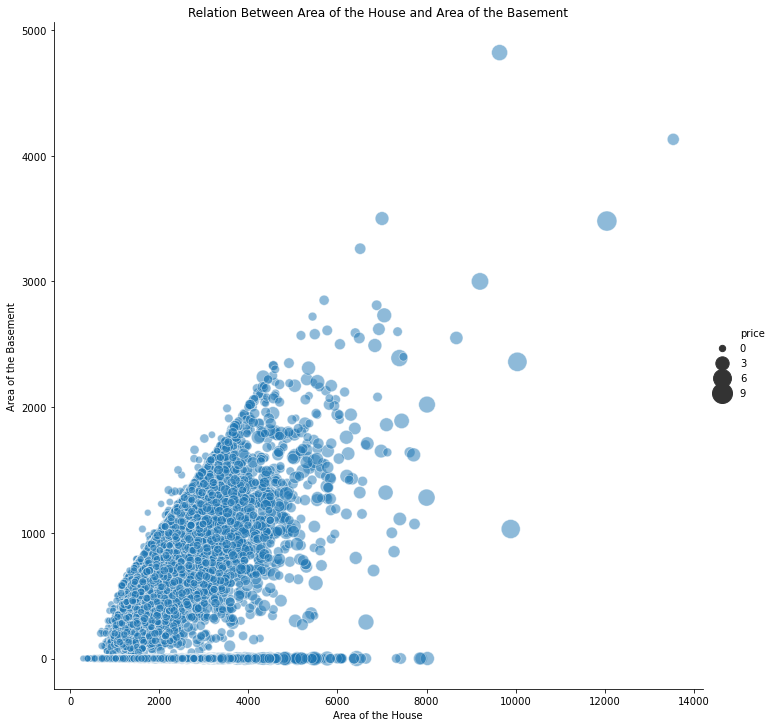

In [31]:
sns.relplot(x="sqft_living", y="sqft_basement", size="price",sizes=(40, 400), alpha=.5, palette="muted",height=10, data=house)
plt.title('Relation Between Area of the House and Area of the Basement')
plt.xlabel('Area of the House')
plt.ylabel('Area of the Basement')
plt.show()
# Draw a relationplot of Area of the House, Area of the Basement and the Price

From the graph above, we can see that either the basement area increases of keeps at zero while the area of the house increases.

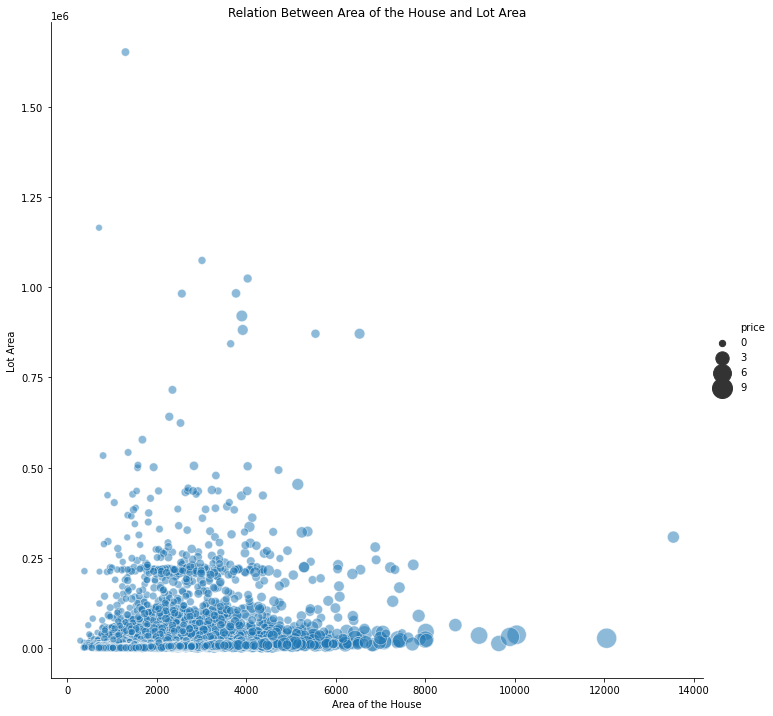

In [32]:
sns.relplot(x="sqft_living", y="sqft_lot",  size="price",sizes=(40, 400), alpha=.5, palette="muted",height=10, data=house)
plt.title('Relation Between Area of the House and Lot Area')
plt.xlabel('Area of the House')
plt.ylabel('Lot Area')
plt.show()
# Draw a relationplot of Area of the House, Lot Area and the Price

From the graph above, we can find out that the lot area usually stays at zero while the area increases, but some has great lot area.

### iii Inside V.S. Price

#### 1) Bedrooms V.S. Price

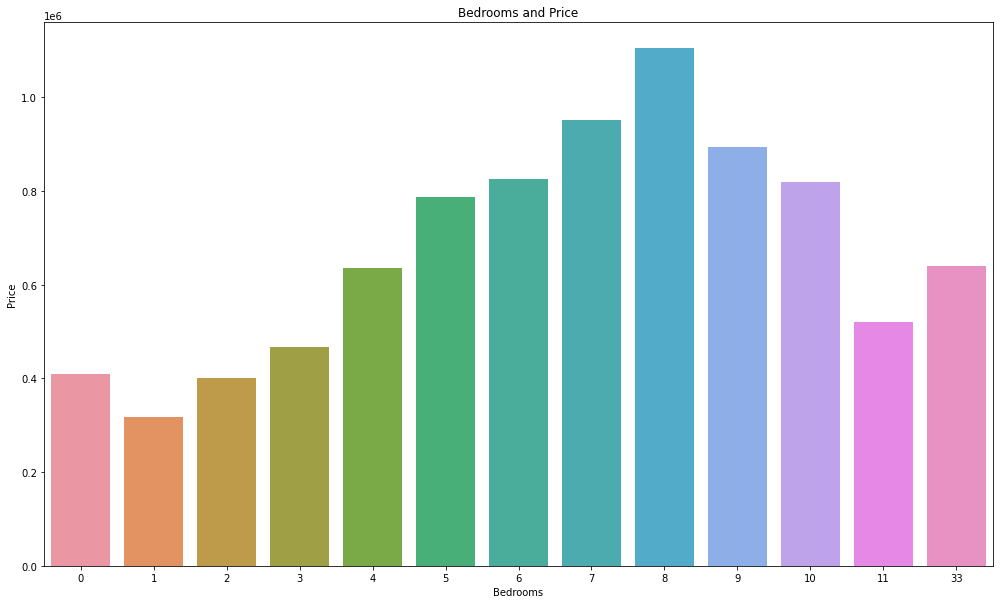

In [33]:
plt.subplots(1,1,figsize=(17,10))
sns.barplot(x = house.groupby('bedrooms')['price'].mean().index, y = house.groupby('bedrooms')['price'].mean().values)
plt.title('Bedrooms and Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()
# Draw a bar plot abour Bedrooms and Price

This picture shows the relationship between the number of bedrooms and the price. From this chart we can see the number of bedrooms goes up but the price sometimes does not go up as the bedrooms.

#### 2) Floors V.S. Price

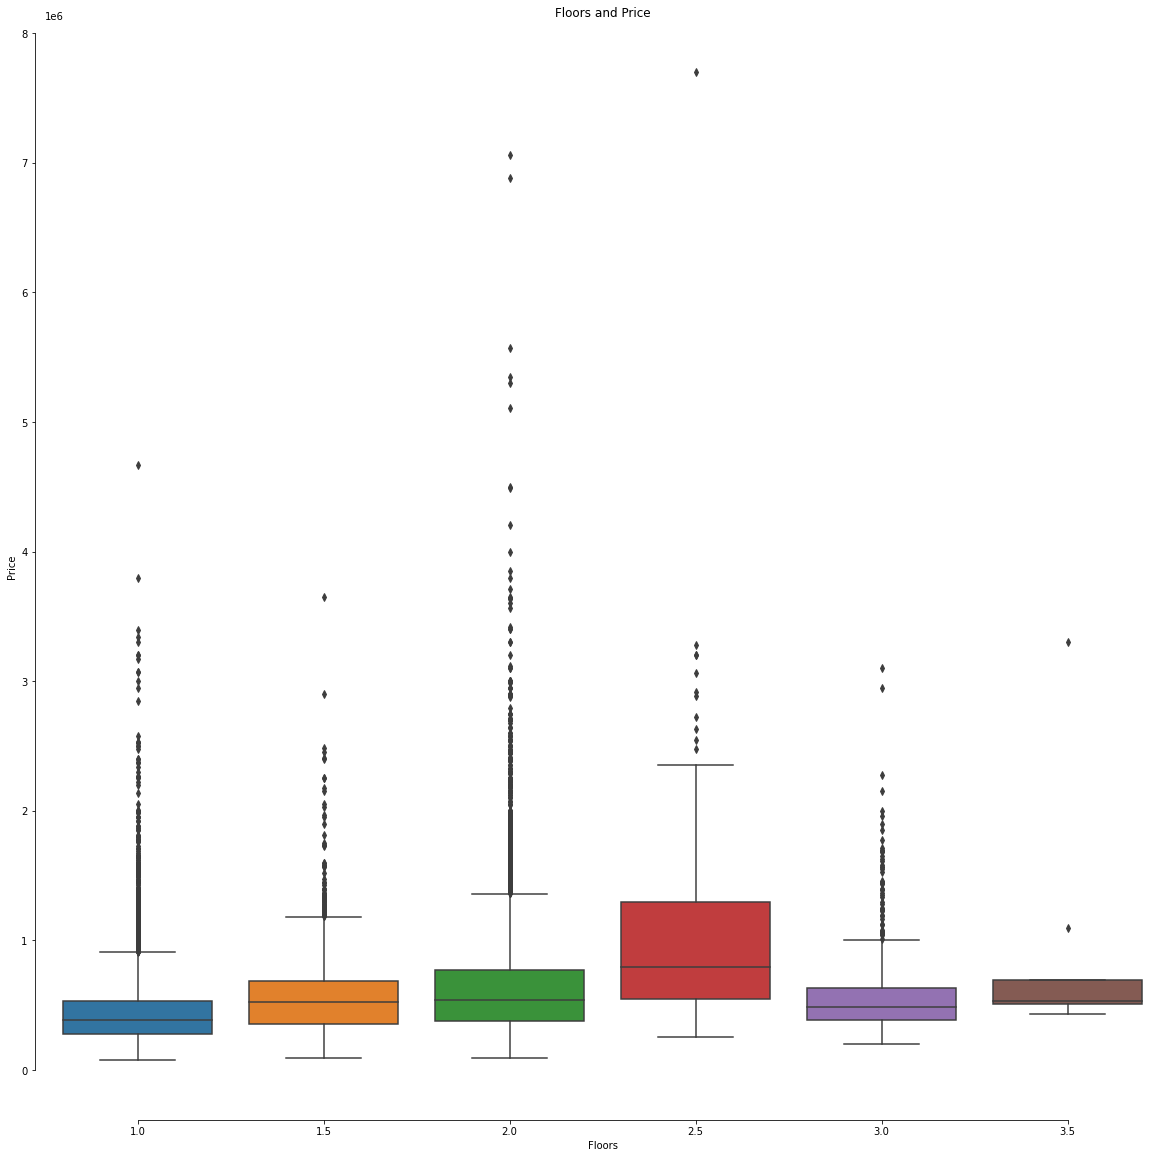

In [34]:
plt.subplots(1,1,figsize=(20,20))
sns.boxplot(x="floors", y="price",data=house)
sns.despine(offset=10, trim=True)
plt.title('Floors and Price')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.show()
# Draw a box plot about Floors and Price

This chart shows the relationship between floor and price. Fifty percent of the floor price is almost at the same level, and the maximum gap is larger.

#### 3) Bathrooms V.S. Price

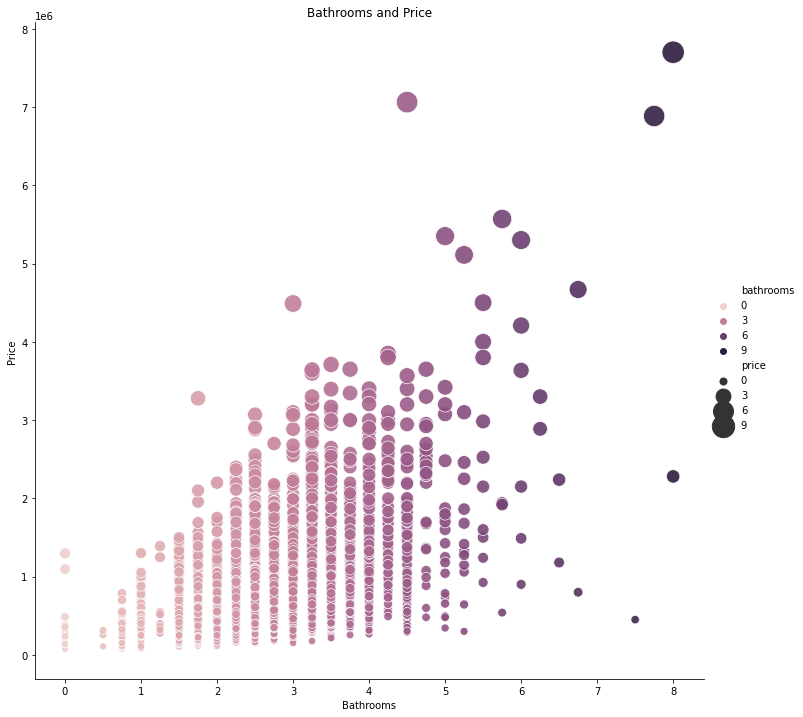

In [35]:
sns.relplot(x="bathrooms", y="price", hue="bathrooms", size="price",sizes=(50, 500), alpha=.9, height=10, data=house)
plt.title('Bathrooms and Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()
# Draw a relation plot about Bathrooms and Price

This plot illustrates the relationship between bathrooms and price. The number of points represents the number of bathrooms, and the more This plot illustrates the relationship between the price and the bathrooms. At the same time, the size of the point represents the price level, and the higher the point, the higher the house price is.

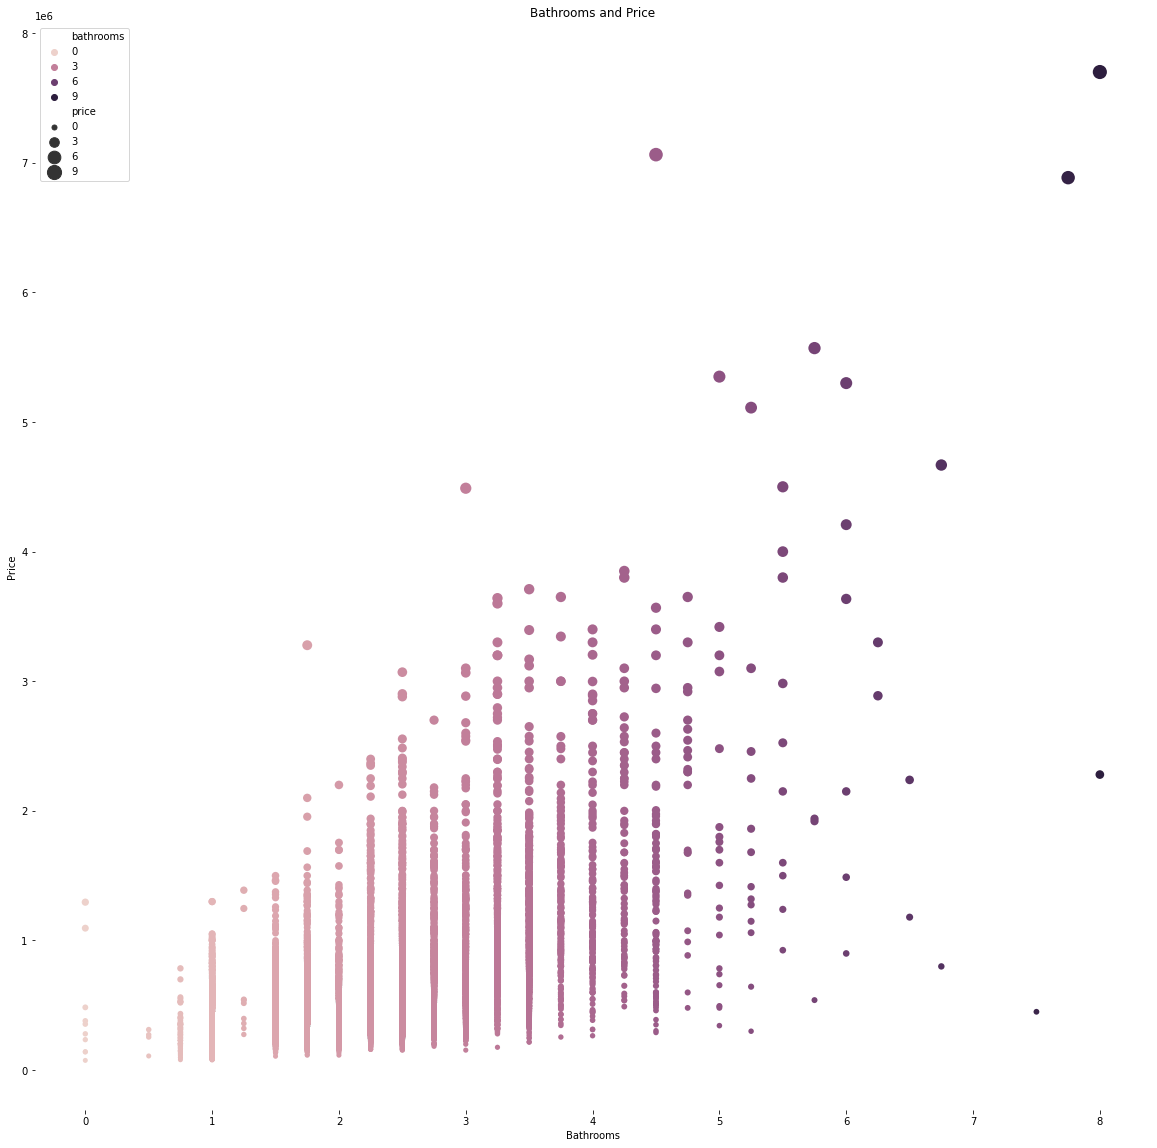

In [36]:
f, ax = plt.subplots(1,1,figsize=(20, 20))
sns.despine(f, left=True, bottom=True)
bathrooms_ranking = [house.groupby('bathrooms')['price'].mean().index]
sns.scatterplot(x="bathrooms", y="price",hue="bathrooms", size="price",sizes=(25,200), linewidth=0, data=house, ax = ax)
plt.title('Bathrooms and Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()
# Draw a scatter plot about Bathrooms and Price

This table is also used to analyze the relationship between the number of bathrooms and the price. The denser the points on this table, the more the price of the bathroom is concentrated. We can find that the number of bathrooms before the number of bathrooms is mostly between 1 million and 2 million.

#### 4) Bedrooms V.S. Bathrooms V.S. Floors

In [37]:
house2=house[['bedrooms','bathrooms','floors','price']] # Make a DF called house2 (to draw the heatmap)

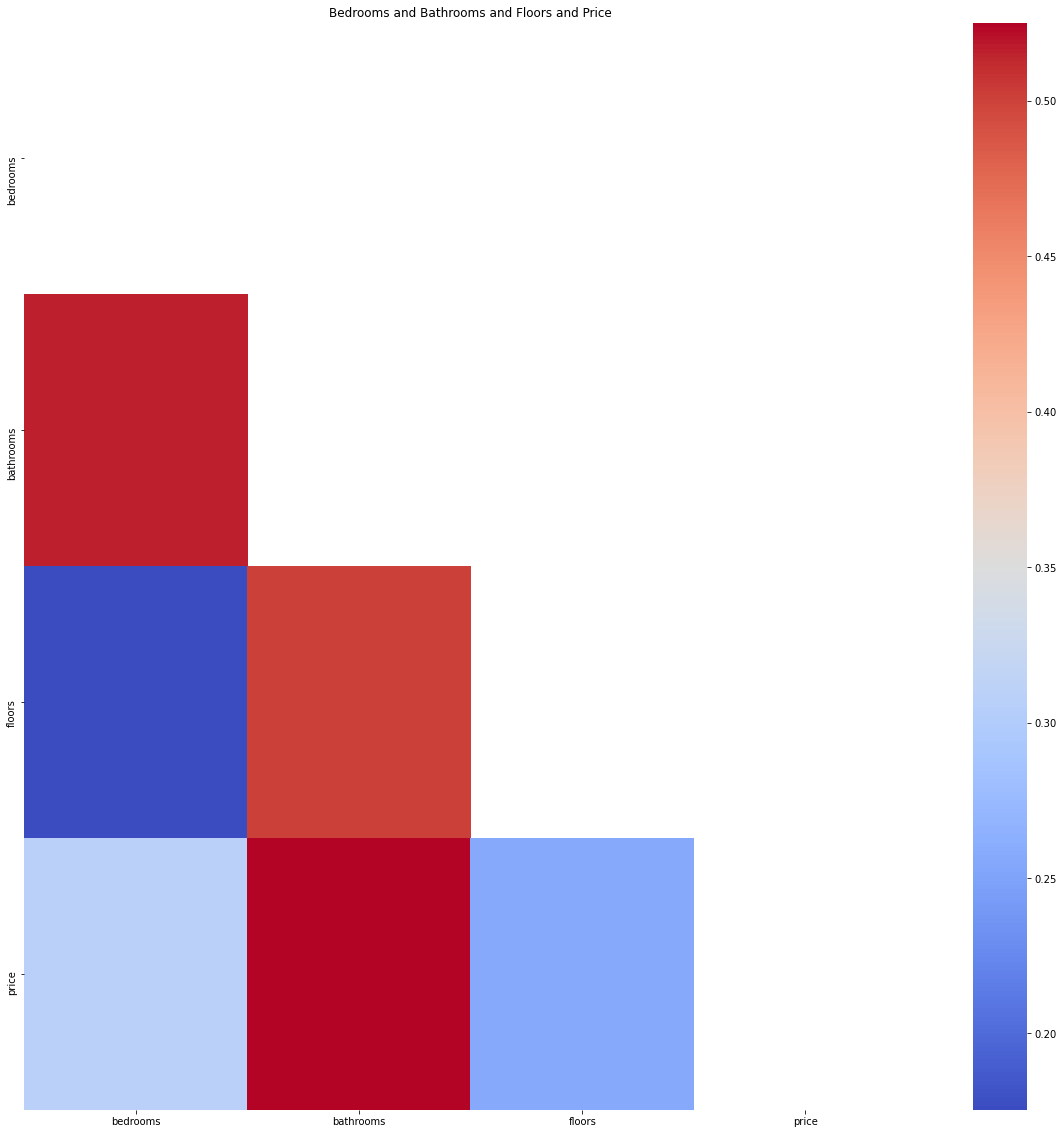

In [38]:
plt.subplots(1,1,figsize=(20,20))
mask = np.zeros_like(house2.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(house2.corr(), mask = mask, cmap = "coolwarm")
plt.title('Bedrooms and Bathrooms and Floors and Price')
plt.show()
# Draw a heatmap that shows the relationship between insides and price

We can see that there is almost no relationship between them.

### iv Condition+Grade V.S. Price

#### 1) Condition V.S. Price

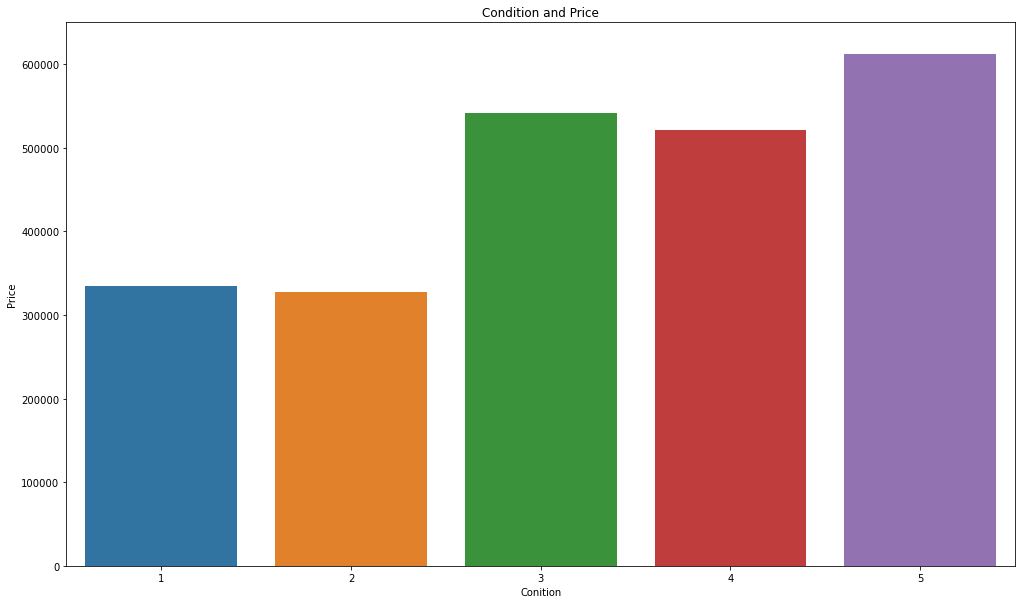

In [39]:
plot_vendor = house.groupby('condition')['price'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(bottom=0, top=6.5e+05)
sns.barplot(plot_vendor.index,plot_vendor.values)
plt.title('Condition and Price')
plt.xlabel('Conition')
plt.ylabel('Price')
plt.show()
# Draw a bar plot about the condition and the price

We can see that as the condition goes up, the mean of the price goes up except for 1->2, 3->4.

#### 2) Grade V.S. Price

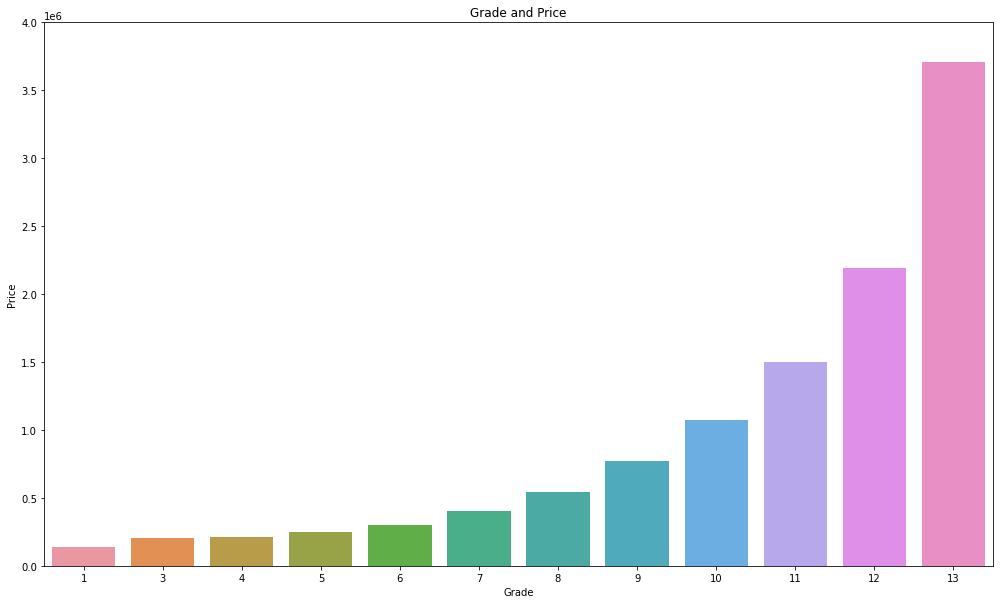

In [40]:
plot_vendor = house.groupby('grade')['price'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(bottom=0, top=4e+06)
sns.barplot(plot_vendor.index,plot_vendor.values)
plt.title('Grade and Price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()
# Draw a bar plot about the grade and the price

We can see that as the grade goes up, the price goes up too.

#### 3) Condition V.S. Grade V.S. Price

In [41]:
house3 = house[['condition','grade','price']] # Make a DF called house3 (to make the heat map)

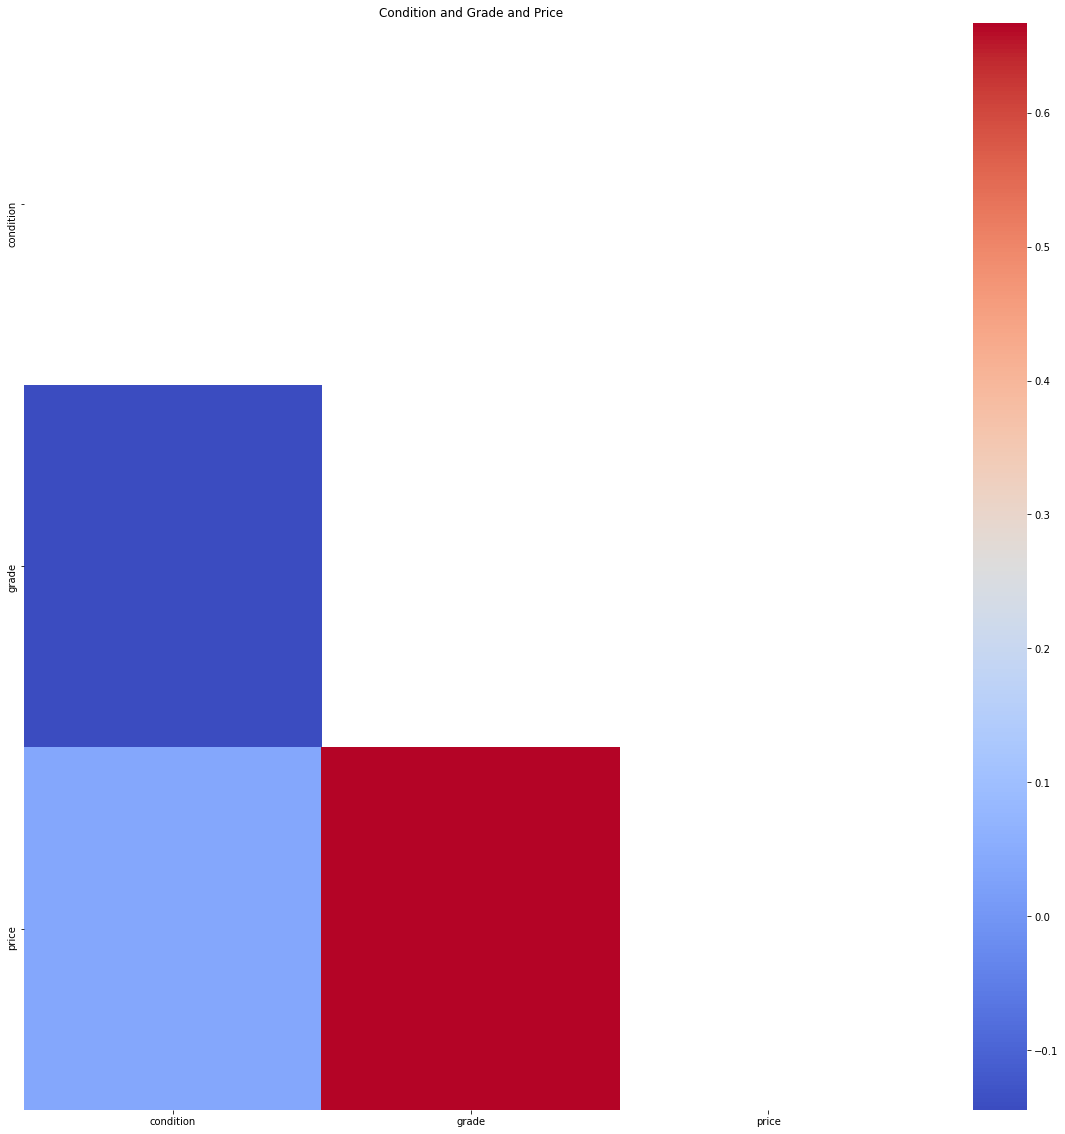

In [42]:
plt.subplots(1,1,figsize=(20,20))
corr = house3.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, cmap = "coolwarm")
plt.title('Condition and Grade and Price')
plt.show()
# Draw a heatmap that shows the relationship between condition, grade and price

Price seems to relate to grade more. But grade and condition are both used to judge houses.

### v Lat+Long V.S. Price

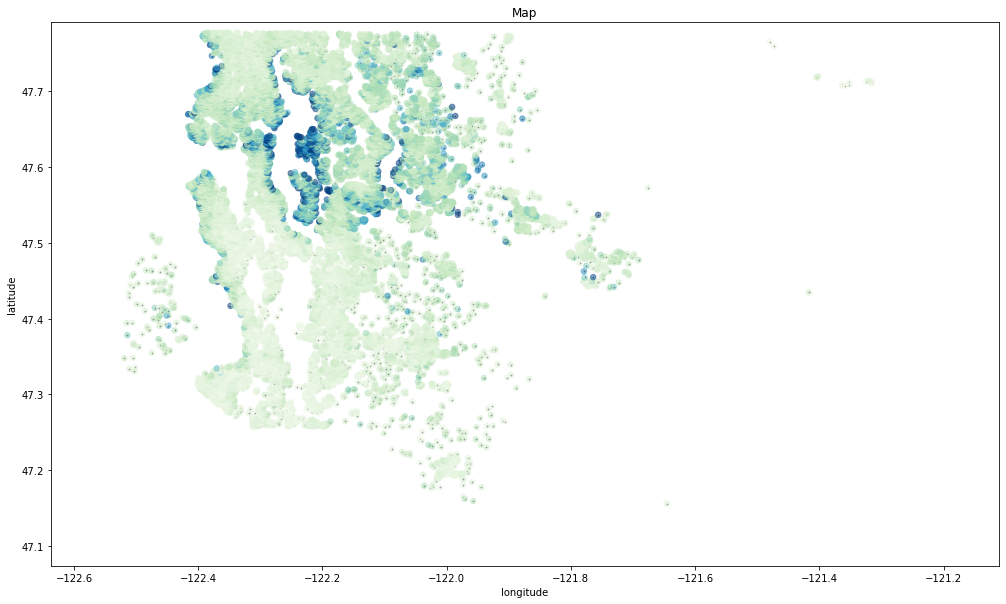

In [43]:
house['index']=house['price'].apply(lambda x: 1)
city_lat_border = (47.073800, 47.791245)
city_long_border = (-122.637670, -121.110422)
gby_cols = ['lat', 'long']
coord_price = house.groupby(gby_cols).mean()[['price']].reset_index()
coord_count = house.groupby(gby_cols).count()[['index']].reset_index()
coord_stats = pd.merge(coord_price, coord_count, on=gby_cols)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (17,10))
ax.scatter(house['long'], house['lat'],c='black', s=1, alpha=0.5)
ax.scatter(coord_stats.long.values, coord_stats.lat.values, c=coord_stats.price.values, cmap='GnBu', s=30, alpha=0.5, vmin=100000, vmax=2000000)

plt.title('Map')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()
# Draw a map that shows the price of King County

We can see that the price of the houses near the waters is greater than the price of houses far from the waters.

### vi Price

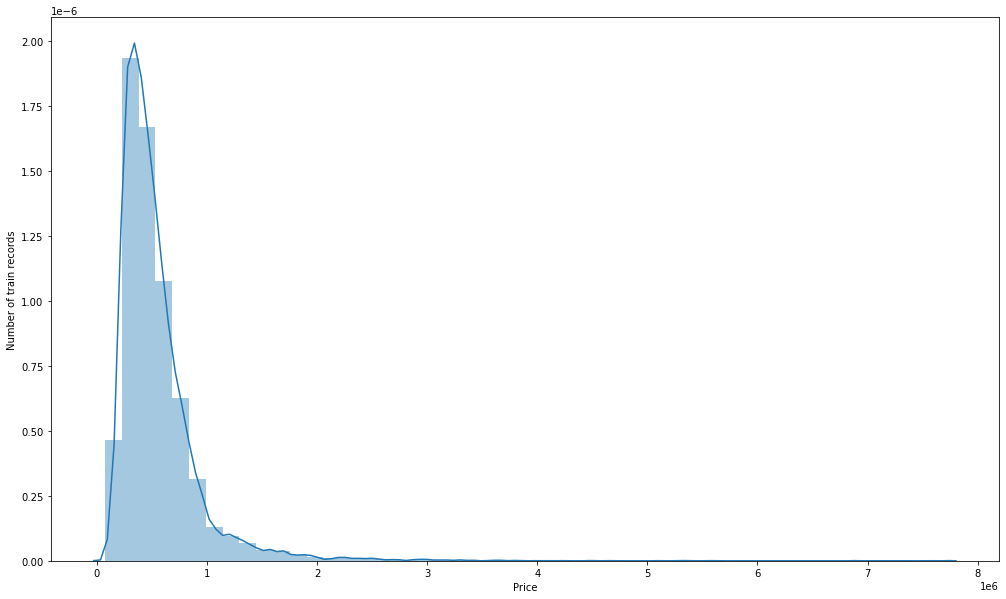

In [44]:
plt.subplots(1,1,figsize = (17,10))
sns.distplot(house['price'])
plt.xlabel('Price')
plt.ylabel('Number of train records')
plt.show()
# Draw a plot that shows the numbers of the dataof the price

### vii Drop No-use Data

In [45]:
house.drop('yr_last_renovated_dec', axis=1, inplace=True) # Drop the data for the modeling behind

'cause of the training, we need to drop it.

### "Before Takeoff Checklist is complete."

### "Clear for takeoff, NHEEEQMT, runway 103c, Camley Street, UCL."

## 4. Cruise Checklist: Making Models

### i Data Normalization

In [46]:
mms = MinMaxScaler()
mms.fit(house)
# Normalize the data for the modelling

MinMaxScaler()

### ii Data Split

In [47]:
x = house.drop('price', axis=1)
y = house['price']
xtrain, xtest, ytrain, ytest = train_test_split(x, y)
# Split the data into train and test

### iii Data Training

In [48]:
rf = RandomForestRegressor()
r = Ridge()
# Train the data: function

In [49]:
kf = KFold()
rf_mse = []
rf_mae = []
r_mse = []
r_mae = []
for train_index, test_index in kf.split(xtrain):
    yTrue = ytrain.iloc[test_index]
    
    rf.fit(xtrain.iloc[train_index], ytrain.iloc[train_index])
    yPred0 = rf.predict(xtrain.iloc[test_index])
    rf_mse.append(mean_squared_error(yTrue, yPred0))
    rf_mae.append(mean_absolute_error(yTrue, yPred0))
    
    r.fit(xtrain.iloc[train_index], ytrain.iloc[train_index])
    yPred1 = r.predict(xtrain.iloc[test_index])
    r_mse.append(mean_squared_error(yTrue, yPred1))
    r_mae.append(mean_absolute_error(yTrue, yPred1))
# Training...

### "Cruise Checklist is complete."

## 5. Before Landing Checklist: Data Evaluation

In [50]:
print("Random Forest: MSE: {} | MAE: {}".format(sqrt(np.mean(rf_mse)), np.mean(rf_mae)))
print("Ridge:         MSE: {} | MAE: {}".format(sqrt(np.mean(r_mse)), np.mean(r_mae)))
# Evaluation

Random Forest: MSE: 136826.6014637769 | MAE: 72508.8884512362
Ridge:         MSE: 207813.17283278058 | MAE: 130164.3069184993


In [51]:
yPred_rf = rf.predict(xtest)
yPred_r = r.predict(xtest)
# Test

In [52]:
ytest = ytest.reset_index()
# To get them all into one DF, we need to reset the index

In [53]:
y = pd.DataFrame({'y_true': ytest['price'], 'pred_rf': pd.Series(yPred_rf), 'pred_r': pd.Series(yPred_r)})
# Get the results and the true value into a DF

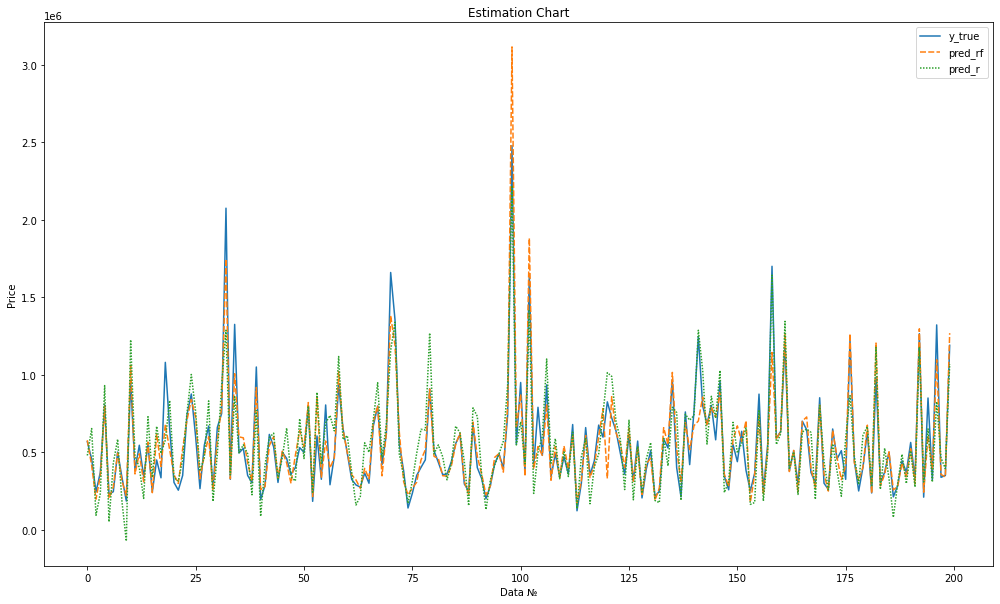

In [54]:
plt.subplots(1,1,figsize = (17,10))
sns.lineplot(data = y[:200])
plt.title('Estimation Chart')
plt.xlabel('Data №')
plt.ylabel('Price')
plt.show()
# Draw a lineplot of the estimation

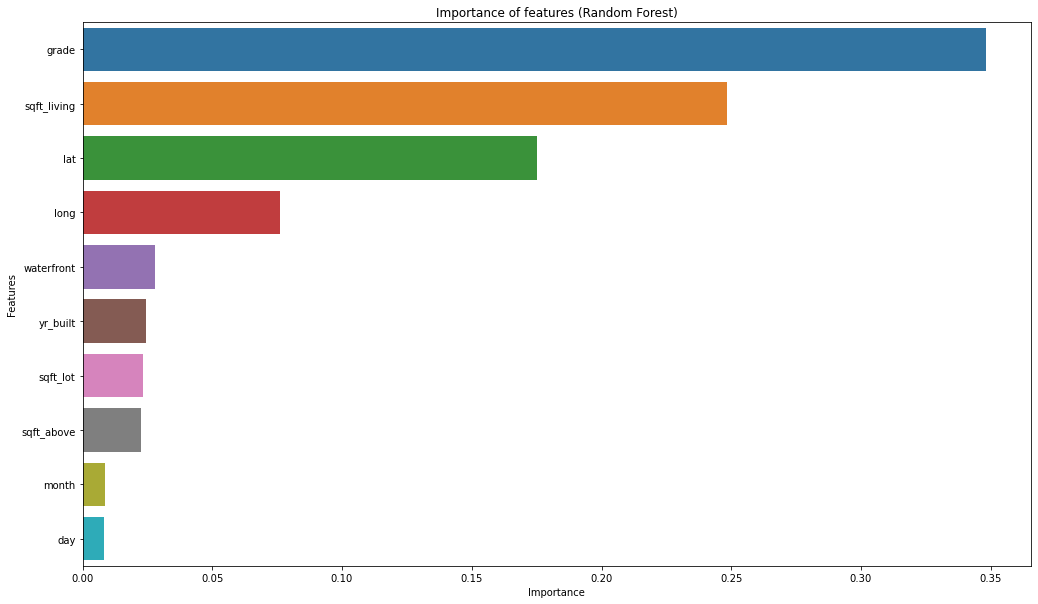

In [55]:
feat_imp = sorted(zip(xtrain.columns, rf.feature_importances_), key=lambda x: x[1], reverse=True)
plt.subplots(1,1,figsize=(17,10))
columns_sorted = [x[0] for x in feat_imp][:10]
feature_scores = [x[1] for x in feat_imp][:10]
sns.barplot(y=columns_sorted, x=feature_scores, orient='h')
plt.title('Importance of features (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
# Show the importance of features of random forest

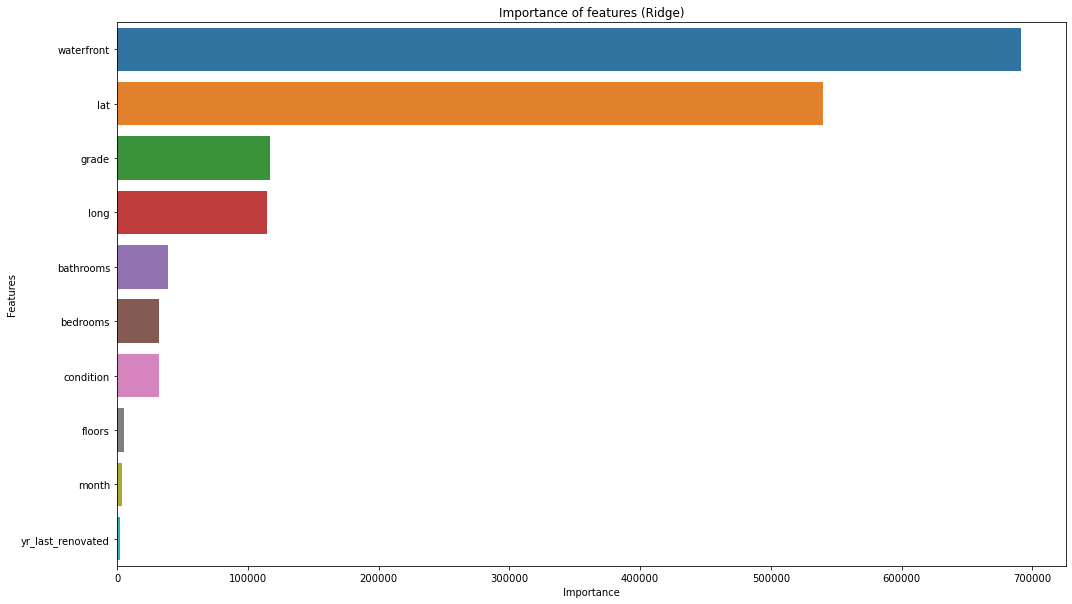

In [56]:
feat_imp = pd.DataFrame({'features': xtrain.columns, 'importance': pd.Series(r.coef_)})
feat_imp['importance'] = feat_imp['importance'].apply(lambda x: abs(x))
feat_imp = feat_imp.sort_values(by=['importance'], ascending=False)
plt.subplots(1,1,figsize=(17,10))
sns.barplot(y='features', x='importance', data=feat_imp[:10], orient='h')
plt.title('Importance of features (Ridge)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
# Show the importance of features of ridge

### "Before Landing Checklist is complete."

### "Clear for landing, NHEEEQMT, runway 103c, Camley Street, UCL."

## 6. Shutdown Checklist: Presentation

[Presentation PPT](https://docs.google.com/presentation/d/1xY8wAMhXNJEEwDEsFVeVAerOrKGidt6AcBemrr272t4/edit#slide=id.p1)

### "Shutdown Checklist is complete."

### "NHEEEQMT, flight plan ended at UTC+0 GMT 19/02/08 19:30:00. Good luck!"